# Fall 2022 Data Science Intern Challenge 
---
#### Question 1:
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.


In [4]:
# import lib
import pandas as pd
import numpy as np
#import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# read the data set 
df = pd.read_excel('2019 Winter Data Science Intern Challenge Data Set.xlsx')

In [6]:
# print 
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


### EDA

In [7]:
# Print Shape
df.shape

(5000, 7)

In [8]:
# check for null values
df.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

* No missing values, data is clean

In [9]:
# check data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


* All columns are int type only Payment_method is string type 

#### AOV wrong claculation:

In [86]:
## Wrong Calculatrion 
np.mean(df['order_amount'])

3145.128

* The mean value of the total order amount for all the shops calculated is wrong, 
* The average order value (AOV), is the average amount spent each time a customer places an order for the sneakers over a 30-day period.
* AOV is calculated is total revenue by the total number of orders.

In [12]:
# describe check the statistics 
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


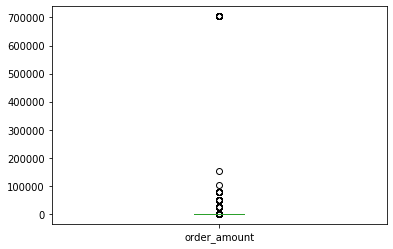

In [13]:
# box plot
df['order_amount'].plot(kind='box')

* In Box plot we can clearly see the outliers, need to be fixed 

### Calculate the AOV:
correct way

In [14]:
# Average order value
df['AOV_per_shop'] = df['order_amount']/df['total_items']

In [15]:
df[['order_id','shop_id','AOV_per_shop']]

,order_id,shop_id,AOV_per_shop
0,1,53,112.0
1,2,92,90.0
2,3,44,144.0
3,4,18,156.0
4,5,18,156.0
...,...,...,...
4995,4996,73,165.0
4996,4997,48,117.0
4997,4998,56,117.0
4998,4999,60,177.0


In [16]:
## Mean 
Avg_order_val = np.mean(df['AOV_per_shop'])
Avg_order_val

387.7428

* Average order value is very high, 
* there may something wrong, 
* may some shop are selling the shoe at very high price  or the very low price 
we can see that by doing groupby each shop

In [92]:
# group by with the shop_id 
df.groupby(['shop_id'])['AOV_per_shop'].mean()
df.reset_index()
df.sort_values(by=['AOV_per_shop'],ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,AOV_per_shop
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:34.551,25725.0
2906,2907,78,817,77175,3,debit,2017-03-16 03:45:46.089,25725.0
4505,4506,78,866,25725,1,debit,2017-03-22 22:06:00.804,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35.400,25725.0
2452,2453,78,709,51450,2,cash,2017-03-27 11:04:04.363,25725.0
...,...,...,...,...,...,...,...,...
2714,2715,92,905,180,2,cash,2017-03-15 17:02:27.545,90.0
3915,3916,92,760,180,2,cash,2017-03-26 15:44:39.844,90.0
4760,4761,92,937,90,1,debit,2017-03-20 07:37:27.858,90.0
2128,2129,92,729,180,2,credit_card,2017-03-03 17:26:31.806,90.0


* we see that the shop_id 78 avg is very high, Overprice, 
* seeing all the rocords of the shop 78

### calculating the avg by removing the Average after excluding shop_id 78 

In [17]:
# exculede shop_id 78
df1 = df[df['shop_id'] != 78]
df1.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,AOV_per_shop
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999,90.0
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649,156.0
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773,156.0


In [18]:
# mean
np.mean(df1['AOV_per_shop'])

152.47557529269278

### Try to see are there any still outliers 

In [19]:
# calcuate the total items 
df1['total_items'].value_counts()

2       1816
1       1811
3        932
4        292
5         77
2000      17
6          8
8          1
Name: total_items, dtype: int64

* 2000 total items there something not correct 

In [20]:
# outliers 2000 items 
outliers = df1.loc[df1['total_items'] == 2000]
print(outliers['shop_id'].value_counts().sort_index())

42    17
Name: shop_id, dtype: int64


In [21]:
# print the shop id 42
df1[df1['shop_id'] == 42].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,AOV_per_shop
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000,352.0
40,41,42,793,352,1,credit_card,2017-03-24 14:15:40.649,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00.000,352.0
308,309,42,770,352,1,credit_card,2017-03-11 18:14:38.774,352.0
409,410,42,904,704,2,credit_card,2017-03-04 14:32:57.621,352.0


* 2000 items purchased from the shop_id 42 is not correct need to be removed 

In [22]:
# remove the shop id 42
final = df1[df1['shop_id'] != 42]
final.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,AOV_per_shop
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999,90.0
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649,156.0
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773,156.0


#### Mean of AOV

In [26]:
# mean
np.mean(final['AOV_per_shop'])

150.40016316540894

#### Median of AOV

In [27]:
np.median(final['AOV_per_shop'])

153.0

#### Mean of order amount

In [24]:
# Average amount per order
np.mean(final['order_amount'])

300.1558229655313

#### Median of order amount

In [25]:
# median amount per order
np.median(final['order_amount'])

284.0

## Question 1a:
#### a:Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
* Order amount for shop_id 78 is very high 
* 17 orders and 2000 items are being purchased for shopId 42. 
This could be a mistake, this made AOV value to be very high, SO need to fixed

## Question 1b:
#### b:What metric would you report for this dataset?
* I tried mean and median to see which will be more accurate value. 
* median would be best option and not end of having skewed data 

## Question 1c:
#### c:What is its value?
* •	Tried both mean and median but MEDIAN would be best option giving 284.0 for all value of the products.


# SQL part
# Question 2: 
For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

## Question 2a:
#### a. How many orders were shipped by Speedy Express in total?

SELECT S.ShipperName, COUNT(O.OrderID) AS Number_of_orders   
FROM Orders AS O  
LEFT JOIN Shippers AS S  
ON  O.ShipperID = S.ShipperID  
GROUP BY ShipperName  
HAVING ShipperName = 'Speedy Express';  

#### Output: 
 Speedy Express = 54 

## Question 2b:
#### b. What is the last name of the employee with the most orders?

SELECT E.LastName, Count(*) AS number_of_orders  
FROM Orders AS O  
JOIN Employees AS E   
ON E.EmployeeID = O.EmployeeID  
GROUP BY E.EmployeeID  
ORDER BY number_of_orders DESC   
LIMIT 1;  

### Output
Peacock = 40

## Question 2c:
#### c. What product was ordered the most by customers in Germany?

SELECT P.ProductName, SUM(OD.Quantity) AS total FROM OrderDetails OD  
JOIN Products AS P 
ON P.ProductID=OD.ProductID    
JOIN Orders AS O   
ON O.OrderID=OD.OrderID    
JOIN (SELECT CustomerID FROM Customers WHERE Country="Germany") AS C   
ON C.CustomerID=O.CustomerID    
GROUP BY OD.ProductID  
ORDER BY total DESC LIMIT 1;  

#### Output: 
Boston Crab Meat = 160